In [12]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GaussianNoise, GlobalMaxPooling2D
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Paths
train_dir = '/Users/sukanya/Documents/Alziemers Multi Modal/Split Dataset/train'  
test_dir = '/Users/sukanya/Documents/Alziemers Multi Modal/Split Dataset/test' 

# Loading Images and Labels

In [3]:
#  Loading images and label
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),  
    batch_size=32,         
    label_mode='int',       
    shuffle=True
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='int',
    shuffle=True
)

Found 795 files belonging to 4 classes.
Found 201 files belonging to 4 classes.


In [4]:
# Class Names
class_names = train_dataset.class_names
print("Class names:", class_names)

Class names: ['Mild Dementia', 'Moderate Dementia', 'No Dementia', 'Severe Dementia ']


## Normalizing Images

In [5]:
# Normalize the image data
normalization_layer = layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [6]:
input_shape = (256, 256, 3)

# CNN Model 2

In [7]:
#CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(GaussianNoise(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(GaussianNoise(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(GaussianNoise(0.1))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 gaussian_noise (GaussianNo  (None, 256, 256, 32)      0         
 ise)                                                            
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 average_pooling2d (Average  (None, 64, 64, 64)        0

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
# Training the model
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=15 
)

Epoch 1/15
25/25 [==============================] - 23s 895ms/step - loss: 1.7010 - accuracy: 0.4465 - val_loss: 1.3754 - val_accuracy: 0.4876
Epoch 2/15
25/25 [==============================] - 23s 917ms/step - loss: 1.2078 - accuracy: 0.4931 - val_loss: 1.3646 - val_accuracy: 0.4876
Epoch 3/15
25/25 [==============================] - 24s 944ms/step - loss: 1.2014 - accuracy: 0.4931 - val_loss: 1.3584 - val_accuracy: 0.4876
Epoch 4/15
25/25 [==============================] - 24s 937ms/step - loss: 1.1745 - accuracy: 0.4931 - val_loss: 1.3475 - val_accuracy: 0.4876
Epoch 5/15
25/25 [==============================] - 23s 922ms/step - loss: 1.1702 - accuracy: 0.4931 - val_loss: 1.3474 - val_accuracy: 0.4876
Epoch 6/15
25/25 [==============================] - 24s 943ms/step - loss: 1.1764 - accuracy: 0.4931 - val_loss: 1.3403 - val_accuracy: 0.4876
Epoch 7/15
25/25 [==============================] - 23s 902ms/step - loss: 1.1713 - accuracy: 0.4931 - val_loss: 1.3321 - val_accuracy: 0.4876

## Model Metrics

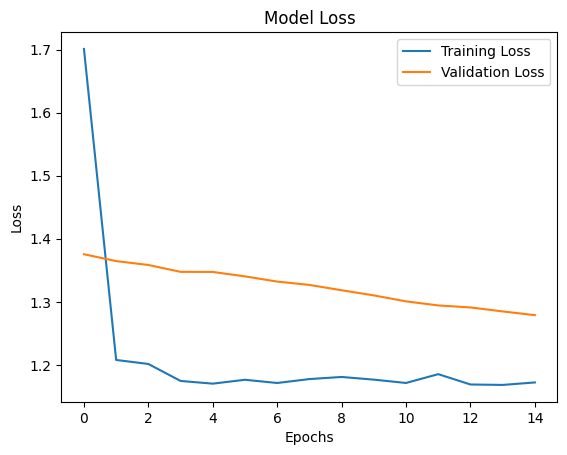

In [13]:
# Training & validation loss 
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

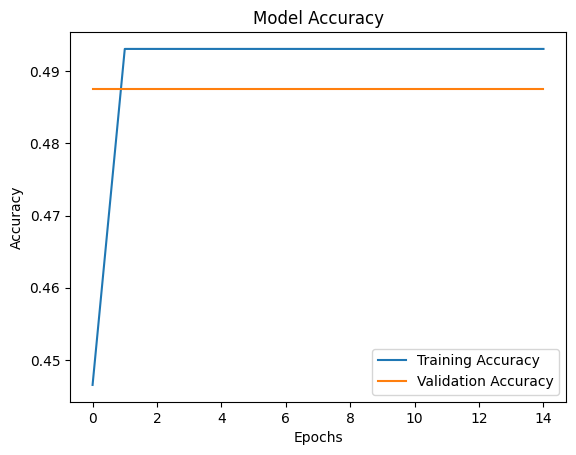

In [14]:
# Training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [15]:
# Metrics
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"Final Training Loss: {final_train_loss}")
print(f"Final Validation Loss: {final_val_loss}")
print(f"Final Training Accuracy: {final_train_acc}")
print(f"Final Validation Accuracy: {final_val_acc}")

Final Training Loss: 1.1721547842025757
Final Validation Loss: 1.2788753509521484
Final Training Accuracy: 0.4930817484855652
Final Validation Accuracy: 0.4875621795654297


7/7 [==============================] - 1s 179ms/step


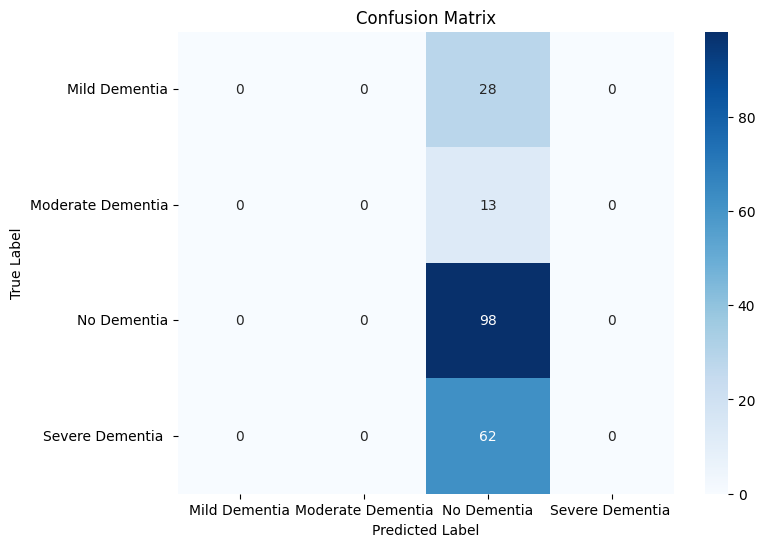

In [16]:
# Confusion Matrix
y_pred = np.argmax(model.predict(test_dataset), axis=-1)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()